In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
category = {1: 'car', 2: 'truck', 3: 'pedestrian', 4: 'bicyclist', 5: 'light'}

In [3]:
data_val = pd.read_csv('/Users/rhira/Repo/Object_Detection/data/labels_trainval.csv')
data_val.head()

,frame,xmin,xmax,ymin,ymax,class_id
0,1478019952686311006.jpg,237,251,143,155,1
1,1478019952686311006.jpg,437,454,120,186,3
2,1478019953180167674.jpg,218,231,146,158,1
3,1478019953689774621.jpg,171,182,141,154,2
4,1478019953689774621.jpg,179,191,144,155,1


In [4]:
data_val.dtypes

frame       object
xmin         int64
xmax         int64
ymin         int64
ymax         int64
class_id     int64
dtype: object

In [5]:
data_val["name"] = data_val.class_id.map(lambda x: category[x])

<AxesSubplot:>

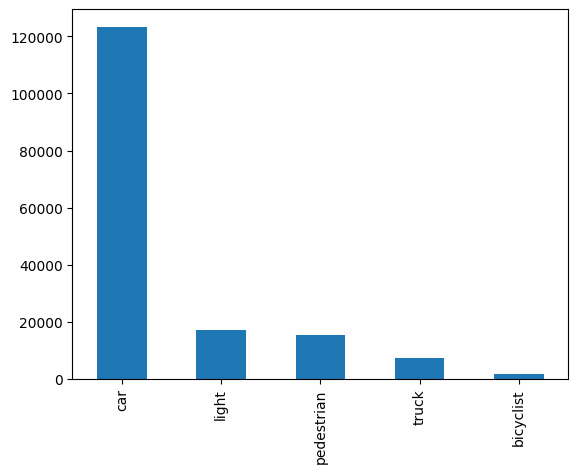

In [6]:
data_val.name.value_counts().plot(kind = 'bar')

In [7]:
columns = data_val.columns
columns

Index(['frame', 'xmin', 'xmax', 'ymin', 'ymax', 'class_id', 'name'], dtype='object')

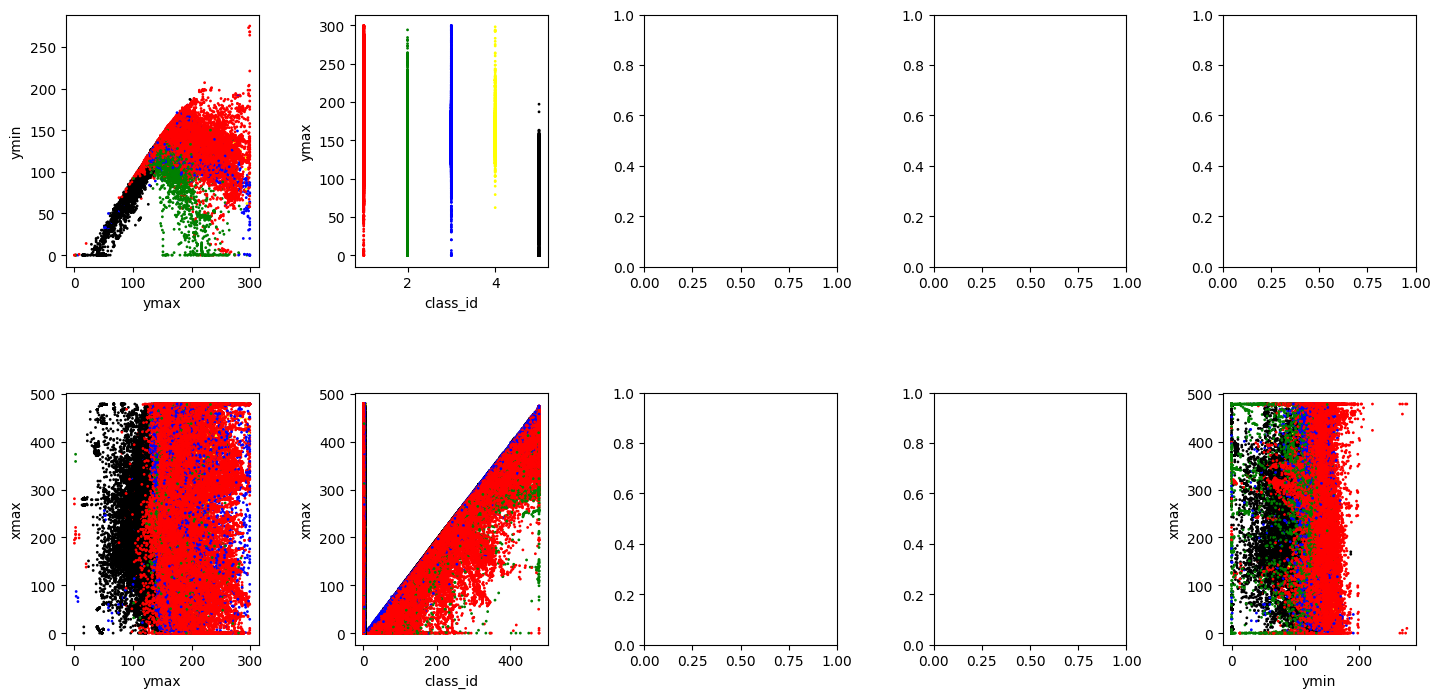

In [11]:
# for id  in range(1,6):
# data = data_val[data_val['class_id'] == id]
data = data_val
colors = {'car':'red', 'truck':'green', 'pedestrian':'blue', 'bicyclist':'yellow', 'light':'black'}
fig, ax = plt.subplots(2,5, figsize=(15, 7),)
cn = 3
i = 0
for col_i in range(1,6):
    y1 = data[columns[col_i]]
    for col_j in range(col_i+1,6):
        x1 = data[columns[col_j]]
        ax[int((col_i//cn)-1),int((col_j%cn)-1)].scatter(x1, y1, c=data['name'].map(colors), s=1)

        #add axis labels to plot
        ax[int((col_i//cn)-1),int((col_j%cn)-1)].set_ylabel(columns[col_i])
        ax[int((col_i//cn)-1),int((col_j%cn)-1)].set_xlabel(columns[col_j])
    i += 1

# #display plot
# fig.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=1, 
                    wspace=0.5, 
                    hspace=0.5)
plt.show()

In [18]:
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with -9).